In [1]:
import csv 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore') # feel free to comment this out if you want to see warnings 

In [2]:
covid = pd.read_csv('../data/corona-virus-report/covid_19_clean_complete.csv')

We want to see what our data looks like:

In [3]:
covid.head(15)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0
5,British Columbia,Canada,49.2827,-123.1207,1/22/20,0.0,0.0,0.0
6,New South Wales,Australia,-33.8688,151.2093,1/22/20,0.0,0.0,0.0
7,Victoria,Australia,-37.8136,144.9631,1/22/20,0.0,0.0,0.0
8,Queensland,Australia,-28.0167,153.4000,1/22/20,0.0,0.0,0.0
9,NaN,Cambodia,11.5500,104.9167,1/22/20,0.0,0.0,0.0


### Pre-processing

We want to isolate our data to find: Country, Date, and Confirmed Cases 

In [4]:
covid = covid[['Country/Region', 'Date', 'Confirmed']]

Let's see how the US is doing 

In [5]:
US = covid.loc[covid['Country/Region'] == "US"]
US

,Country/Region,Date,Confirmed
98,US,1/22/20,0.0
99,US,1/22/20,0.0
100,US,1/22/20,0.0
101,US,1/22/20,0.0
102,US,1/22/20,0.0
...,...,...,...
19136,US,3/23/20,23.0
19150,US,3/23/20,27.0
19167,US,3/23/20,NaN
19210,US,3/23/20,6.0


We notice that by isolating rows with Country/Region == US, we will end up with multiple rows with the same date. This is because this dataset is reporting different states as well. What we want to do is sum up all "Confirmed" values based on grouped dates. 

Also we need to convert the Date column from str to datetime in order to sort 

In [6]:
US[['Date']] = US['Date'].apply(pd.to_datetime)

In [7]:
col = ["Country/Region","Date"]
US = US.groupby(col, as_index=False).Confirmed.sum()

In [8]:
US = US.sort_values(['Date'], ascending=[True])

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(US)

   Country/Region       Date  Confirmed
0              US 2020-01-22        0.0
1              US 2020-01-23        0.0
2              US 2020-01-24        0.0
3              US 2020-01-25        0.0
4              US 2020-01-26        0.0
5              US 2020-01-27        0.0
6              US 2020-01-28        0.0
7              US 2020-01-29        0.0
8              US 2020-01-30        0.0
9              US 2020-01-31        0.0
10             US 2020-02-01        0.0
11             US 2020-02-02        0.0
12             US 2020-02-03        0.0
13             US 2020-02-04        0.0
14             US 2020-02-05        0.0
15             US 2020-02-06        0.0
16             US 2020-02-07        0.0
17             US 2020-02-08        0.0
18             US 2020-02-09        0.0
19             US 2020-02-10        0.0
20             US 2020-02-11        0.0
21             US 2020-02-12        0.0
22             US 2020-02-13        0.0
23             US 2020-02-14        0.0


Since not all countries will "line" up with each other in terms of dates, let's set a mark where we only start looking after the 10th or so confirmed case 

In [10]:
US = US.loc[US["Confirmed"] > 10.0] 
US

,Country/Region,Date,Confirmed
33,US,2020-02-24,36.0
34,US,2020-02-25,36.0
35,US,2020-02-26,42.0
36,US,2020-02-27,42.0
37,US,2020-02-28,44.0
38,US,2020-02-29,44.0
39,US,2020-03-01,44.0
40,US,2020-03-02,45.0
41,US,2020-03-03,45.0
42,US,2020-03-04,45.0


Now we should reset the index, so that it now counts the days after the first 10th confirmed case. This will help lining up all countries together 

In [11]:
US = US.reset_index(drop=True)
US

,Country/Region,Date,Confirmed
0,US,2020-02-24,36.0
1,US,2020-02-25,36.0
2,US,2020-02-26,42.0
3,US,2020-02-27,42.0
4,US,2020-02-28,44.0
5,US,2020-02-29,44.0
6,US,2020-03-01,44.0
7,US,2020-03-02,45.0
8,US,2020-03-03,45.0
9,US,2020-03-04,45.0


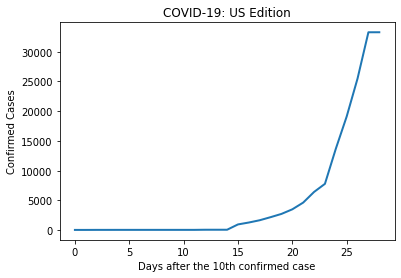

In [12]:
plt.plot(US.index, US['Confirmed'], linewidth = 2)
plt.title("COVID-19: US Edition")
plt.xlabel("Days after the 10th confirmed case")
plt.ylabel("Confirmed Cases")
plt.show()

We should focus on 3 main countries for now 

In [13]:
all_countries = list(covid["Country/Region"].unique())
all_countries 

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Sl

In [14]:
china = covid.loc[covid['Country/Region'] == "China"]
china[['Date']] = china['Date'].apply(pd.to_datetime)
china = china.sort_values(['Date'], ascending=[True])
col = ["Country/Region","Date"]
china = china.groupby(col, as_index=False).Confirmed.sum()
china = china.loc[china["Confirmed"] > 10.0] 
china = china.reset_index(drop=True)


italy = covid.loc[covid['Country/Region'] == "Italy"]
italy[['Date']] = italy['Date'].apply(pd.to_datetime)
italy = italy.sort_values(['Date'], ascending=[True])
col = ["Country/Region","Date"]
italy = italy.groupby(col, as_index=False).Confirmed.sum()
italy = italy.loc[italy["Confirmed"] > 10.0] 
italy = italy.reset_index(drop=True)

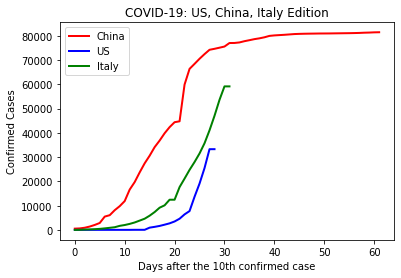

In [15]:
plt.plot(china.index, china['Confirmed'], 'r', linewidth = 2, label="China")
plt.plot(US.index, US['Confirmed'],'b',linewidth = 2, label="US")
plt.plot(italy.index, italy['Confirmed'],'g',linewidth = 2, label="Italy")
plt.title("COVID-19: US, China, Italy Edition")
plt.xlabel("Days after the 10th confirmed case")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

Moving forward, you can call "US", "Italy", or "China" to work for either country